In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)


In [2]:
df1 = pdr.get_data_yahoo('AAPL',start='2011-01-01',end='2021-10-31')
df1 = df1[['Open','Close']]
df1 = df1.rename(columns ={'Open': 'Open_AAPL', 'Close':'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT','2010-11-01','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open': 'Open_MSFT', 'Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('AMZN','2010-11-01','2021-10-31')
df3 = df3[['Open','Close']]
df3 = df3.rename(columns ={'Open':'Open_AMZN','Close':'Close_AMZN'})
df4 = pdr.get_data_yahoo('GOOGL','2010-11-01','2021-10-31')
df4 = df4[['Open','Close']]
df4 = df4.rename(columns ={'Open': 'Open_GOOGL', 'Close':'Close_GOOGL'})
df5 =  pdr.get_data_yahoo('HE','2010-11-01','2021-10-31')
df5 = df5[['Open','Close']]
df5 = df5.rename(columns ={'Open': 'Open_HE', 'Close':'Close_HE'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_AMZN,Close_AMZN,Open_GOOGL,Close_GOOGL,Open_HE,Close_HE
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,181.960007,180.000000,298.668671,297.282288,23.000000,22.790001
2011-01-03,11.630000,11.770357,28.049999,27.980000,181.369995,184.220001,298.538544,302.477478,22.900000,22.920000
2011-01-04,11.872857,11.831786,27.940001,28.090000,186.149994,185.009995,303.113098,301.361359,23.270000,23.850000
2011-01-05,11.769643,11.928571,27.900000,28.000000,184.100006,187.419998,300.335327,304.839844,23.850000,23.809999
2011-01-06,11.954286,11.918929,28.040001,28.820000,186.500000,185.860001,305.645660,307.057068,23.790001,23.870001
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,3335.000000,3320.370117,2751.000000,2748.939941,41.459999,40.990002
2021-10-26,149.330002,149.320007,311.000000,310.109985,3349.510010,3376.070068,2785.270020,2786.169922,41.099998,40.669998
2021-10-27,149.360001,148.850006,316.000000,323.170013,3388.000000,3392.489990,2788.100098,2924.350098,40.880001,40.680000


In [3]:
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_AMZN','Close_GOOGL','Close_HE']]
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT']= three_years['Close_MSFT'].pct_change()
three_years['Return_AMZN']= three_years['Close_AMZN'].pct_change()
three_years['Return_GOOGL']= three_years['Close_GOOGL'].pct_change()
three_years['Return_HE']= three_years['Close_HE'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_AMZN','Return_GOOGL','Return_HE']]
three_years= three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_AMZN,Return_GOOGL,Return_HE
Date,,,,,
2011-01-04,0.005219,0.003931,0.004288,-0.003690,0.040576
2011-01-05,0.008180,-0.003204,0.013026,0.011543,-0.001677
2011-01-06,-0.000808,0.029286,-0.008324,0.007273,0.002520
2011-01-07,0.007161,-0.007634,-0.001991,0.004792,0.037285
2011-01-10,0.018833,-0.013287,-0.004367,-0.003618,-0.014136
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,-0.009233,-0.002923,0.002306
2013-12-26,-0.006641,0.009709,0.013001,0.005055,-0.008052
2013-12-27,-0.006757,-0.004006,-0.015604,0.000841,0.003092


In [4]:
 matrix_of_return_value = np.asmatrix(three_years)
matrix_of_return_value = matrix_of_return_value.T

no_of_asset_classes = 5
no_of_portfolios = 10000

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

def get_portfolio_statistics(asset_weights, matrix_of_return_value):
    asset_means = np.asmatrix(np.mean(matrix_of_return_value, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_value))
    portfolio_mean= asset_weights * asset_means
    portfolio_mean= portfolio_mean.item()
    portfolio_standard_deviation= np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation= portfolio_standard_deviation.item()
    portfolio_sharpe_ratio= portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[2])
    

    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])  

[[0.23976114 0.01456739 0.36641583 0.36884537 0.01041028]]


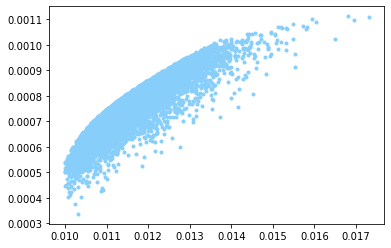

In [5]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

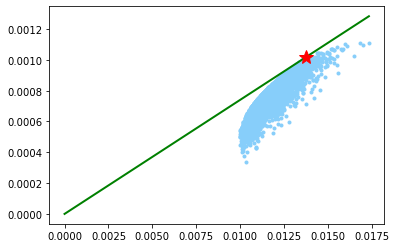

In [6]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

#Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization. 
#Why do portfolio managers seek to maximize this measure

In [7]:
some_wights= pd.DataFrame({'AAPL': [0.30], 'MSFT': [0.20], 'AMZN':[0.30], 'GOOGL':[0.10], 'HE':[0.10] }, index = [three_years.last_valid_index()])
some_wights

,AAPL,MSFT,AMZN,GOOGL,HE
2013-12-31,0.3,0.2,0.3,0.1,0.1


In [8]:
capital = 10000
allocations = capital*some_wights
allocations

,AAPL,MSFT,AMZN,GOOGL,HE
2013-12-31,3000.0,2000.0,3000.0,1000.0,1000.0


In [9]:
print(df['Close_AAPL'].loc[some_wights.last_valid_index()])
print(df['Close_MSFT'].loc[some_wights.last_valid_index()])
print(df['Close_AMZN'].loc[some_wights.last_valid_index()])
print(df['Close_GOOGL'].loc[some_wights.last_valid_index()])
print(df['Close_HE'].loc[some_wights.last_valid_index()])

no_of_shares = allocations /df[[f'Open_{sym}' for sym in some_wights.columns]].loc[some_wights.index[0]].values
no_of_shares

20.036428451538086
37.40999984741211
398.7900085449219
560.9158935546875
26.059999465942383


,AAPL,MSFT,AMZN,GOOGL,HE
2013-12-31,151.578032,53.475934,7.603021,1.796375,38.387717


In [11]:
seven_years = df.loc['2013-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] + seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Open_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Open_HE']*no_of_shares['HE'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Close_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Close_HE']*no_of_shares['HE'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2013-12-31,10000.000000,10077.625020
2014-01-02,10039.712445,9987.371717
2014-01-03,9992.172605,9892.750516
2014-01-06,9873.148123,9850.195459
2014-01-07,9881.011171,9907.678354
...,...,...
2021-10-25,70969.392245,70764.581714
2021-10-26,71313.682778,71451.619987
2021-10-27,71874.888497,72452.223683


Abslute Return of Our Portofolio:629.57%
CAGR of Our Portofolio: 177.27%
Information Ratio of Our Portofolio:1.22



<AxesSubplot:xlabel='Date'>

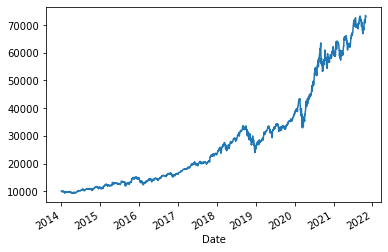

In [13]:
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
seven_years.Close.plot()

In [14]:
short_time = 5
long_time = 15
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2014-01-22,10097.257347,10053.203129,10028.522322,9946.096470,-82.425852,76.474349
2014-01-23,10020.296307,10045.890060,10031.820399,9943.980806,-87.839593,-76.961039
2014-01-24,10084.942957,9883.102936,10002.049287,9937.029554,-65.019733,64.646649
2014-01-27,9932.054875,9829.643425,9976.436122,9932.822415,-43.613707,-152.888082
2014-01-28,9627.488212,9685.446884,9899.457287,9921.839177,22.381890,-304.566663
...,...,...,...,...,...,...
2021-10-25,70969.392245,70764.581714,71499.346627,69972.727367,-1526.619260,-916.983596
2021-10-26,71313.682778,71451.619987,71399.075057,70215.740925,-1183.334132,344.290533
2021-10-27,71874.888497,72452.223683,71543.326749,70477.042839,-1066.283910,561.205719


In [15]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.0004725788310382371]
1,Close,[-0.0009202388040670085]
2,Close_Short_Rolling,[0.00024534062654133404]
3,Close_Long_Rolling,[0.00021158611120276094]
4,Window_diff,[-3.375451533846836e-05]
5,Open_1_change,[0.0007751955696115365]


In [16]:
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[136 441]
 [181 614]]
0.5466472303206997


In [17]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2016-05-20,14139.014493,14195.054943,14167.360805,14077.624491,-89.736313,66.181204,-35.485873,1,-1,-35.485873,-35.485873
2016-05-23,14226.533559,14159.569070,14134.301888,14088.434593,-45.867295,87.519066,241.007494,1,1,241.007494,205.521620
2016-05-24,14240.736744,14400.576564,14197.390986,14121.651088,-75.739898,14.203185,127.270762,-1,1,-127.270762,78.250858
2016-05-25,14472.154927,14527.847326,14275.106260,14164.319610,-110.786650,231.418183,60.037071,1,1,60.037071,138.287930
2016-05-26,14502.600819,14587.884397,14374.186460,14219.111043,-155.075416,30.445892,21.891468,-1,1,-21.891468,116.396461
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,71886.375841,70969.980719,71658.465766,69714.646409,-1943.819356,244.532221,-205.399006,1,-1,-205.399006,12670.422674
2021-10-25,70969.392245,70764.581714,71499.346627,69972.727367,-1526.619260,-916.983596,687.038273,1,1,687.038273,13357.460947
2021-10-26,71313.682778,71451.619987,71399.075057,70215.740925,-1183.334132,344.290533,1000.603696,1,1,1000.603696,14358.064643


Abslute Return of Our Algorithmic Trading:634.78%
Abslute Return of Our buy-and-hold Trading :419.68%
CAGR of Our Algorithmic Trading: 177.48%
CAGR of Our buy-and-hold Trading: 16.45%
Information Ratio of Our Algorithmic Trading:1.37
Information Ratio of Our buy-and-hold Trading:1.37



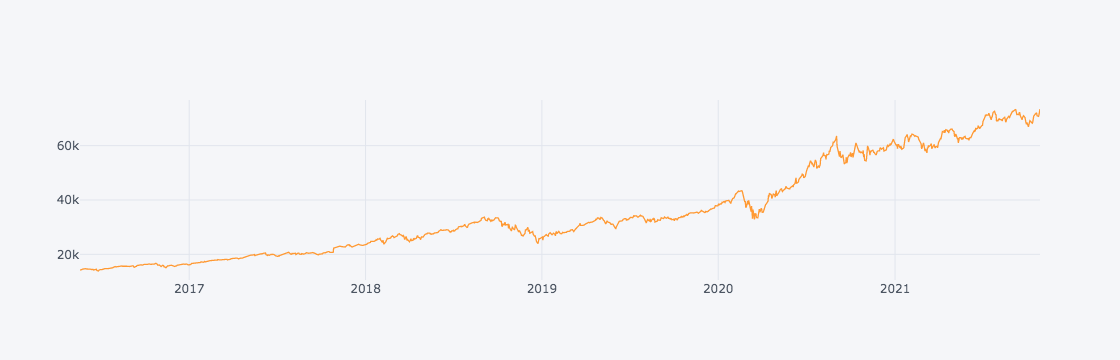

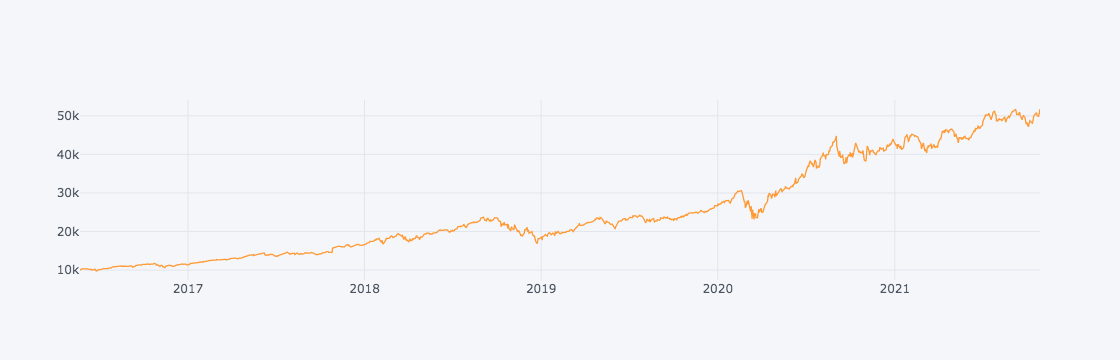

In [18]:
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)



absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()

((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()